## Making Sounds

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.assignment import load_assignment 
tests = load_assignment('making_sounds.ok')

WARNING  | guidance.py:102 | Failed to read .ok_guidance file. It may not exist


Assignment: Making Sounds
OK, version v1.12.10



Let's use arrays (and your computer's speakers) to generate sounds!

##### Brief background on sound
Sound happens when an object moves back-and-forth very quickly, pushing the air around it and creating rapidly oscillating increases and decreases in that air's pressure.  These patterned disturbances in the air move outward in all directions from the object (at the "speed of sound").

[This webpage](https://auditoryneuroscience.com/acoustics/sound_propagation) has a nice visual depiction of a sound.

When a disturbance in the air reaches your ear, your ear detects the air pressure changing at a certain rate, and you hear a particular sound.  Which sound you hear depends on how quickly the pressure goes up and down.  Simple, repeated oscillations sound like single musical *notes* to humans.  If the pressure goes up and down 220 times per second, you hear a note musicians call "A below middle C".

Note that the changes in air pressure that your brain interprets as sound are very *small* and *fast* relative to the kinds of pressure you can feel, say, on your skin.  Ears are sensitive, specialized instruments for detecting small, fast oscillations in pressure.

##### Simulating the pressure pattern of a sound
To generate a sound, then, we have to simulate pressure changes that would cause you to hear that sound.  Computer speakers take instructions like "make the pressure X at time Y," so we will to calculate those pressures.  Let's generate A below middle C for 3 seconds.

First, notice that we can't calculate the pressure at every point in time, because there are infinitely many points in time!

Instead, we'll just pick a bunch of points in time, and find out the pressure on your ear at those snapshots in time.  These snapshots are called *frames*.  In a video, a sequence of still pictures creates the illusion of continuous movement.  In the same way, your brain interprets a quick sequence of different pressures as a continuous sound.

Let's say we'll use 44100 of these frames (points in time where we figure out the pressure) per second.  First we'll compute all the times where we need a frame.

**Question 1.** Create an array called `frame_times`.  It should contain the frame times for the 3-second period.  That is, it should start with 0, then $1/44100$, then $2/44100$, and so on, ending just before $3$.

In [3]:
# You'll find these names useful.
import numpy as np
FRAMES_PER_SECOND = 44100
SOUND_DURATION = 3

frame_times = np.arange(0, SOUND_DURATION, 1/FRAMES_PER_SECOND)
frame_times

array([  0.00000000e+00,   2.26757370e-05,   4.53514739e-05, ...,
         2.99993197e+00,   2.99995465e+00,   2.99997732e+00])

In [4]:
_ = tests.grade('q1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now we need a way to synthesize air pressure numbers that go up and down 220 times per second.  It's customary to use the `sine` function to do that, since it's a nice function that oscillates.  For a sound that oscillates 220 times per second, the pressure at time $t$ is:

$$\text{Pressure at time }t = \texttt{sin}(2 \times \pi \times 220 \times t)$$

The function `np.sin` takes as its argument an array of times and returns an array that's the `sine` of each of those times.  For example,

    np.sin(make_array(0, 1, 2))

is the same as
    
    make_array(math.sin(0), math.sin(1), math.sin(2))

**Question 2.** Use `np.sin`, array arithmetic, and the `frame_times` array you generated above to generate the pressure on your ear at each frame.

In [21]:
import math
A_FREQUENCY = 220
a_pressures = np.sin(2 * math.pi * A_FREQUENCY * frame_times)
a_pressures

array([ 0.        ,  0.03133956,  0.06264832, ..., -0.09389555,
       -0.06264832, -0.03133956])

In [22]:
_ = tests.grade('q2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Here's a graph of 1000 frames of the data you generated, lasting around .025 seconds:

Exception ignored in: <bound method Wave_write.__del__ of <wave.Wave_write object at 0x0000017B98C58828>>
Traceback (most recent call last):
  File "C:\Users\iman\Anaconda3\lib\wave.py", line 316, in __del__
    self.close()
  File "C:\Users\iman\Anaconda3\lib\wave.py", line 434, in close
    self._ensure_header_written(0)
  File "C:\Users\iman\Anaconda3\lib\wave.py", line 454, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


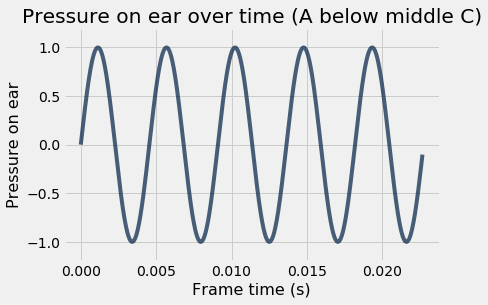

In [23]:
# Just run this cell.  It uses some programming concepts you'll see in the
# next few weeks.
Table().with_columns("Frame time (s)", frame_times, "Pressure on ear", a_pressures).take(range(1000)).plot(0)
plt.ylim(-1.2, 1.2)
_ = plt.title("Pressure on ear over time (A below middle C)")

The peaks represent points in time when the pressure on your ear was high, and the troughs represent points in time when it was low.

##### Turning it into sounds
The function `Audio` (in the `IPython.display` module) takes pressure data and passes it to your computer's speakers to produce.  The speakers move rapidly (220 times per second, in this case), producing pressure changes in the air, and your ears interpret these as sound.

`Audio` takes two arguments.  The first is an array containing the pressures you want to generate, like your `pressures` array.  The second is the number of frames per second the data were taken at.  This argument is a *named* argument, which means you have to write `rate=` before it, like this:

    Audio(make_array(0, 1, 2), rate=120)

`Audio` returns an object that represents the sound it will play.  If it's the value of the last line in a cell, it will play when you run that cell.

**Question 3.** Import and call `Audio` to make a sound from your data.  Call it `a_below_middle_c`.

In [24]:
# Warning: When you fill out this cell correctly, running it will
# cause a sound to play!
from IPython.display import Audio
a_below_middle_c = Audio(a_pressures, rate=220)
a_below_middle_c

In [25]:
_ = tests.grade('q3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> # a_below_middle_c should be the name given to the output of a
>>> # call to the function Audio.  So your code should start like
>>> # this:
>>> #   a_below_middle_c = Audio(...)
>>> import IPython.display
>>> type(a_below_middle_c) == IPython.display.Audio
True
>>> # It looks like you're using the wrong array as audio data.
>>> a_below_middle_c.data.startswith(b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\x00\x00\x02\x04\x04\x08\x04\x0c\x01\x10\xfa\x13\xee\x17\xdb\x1b\xc2\x1f\xa1#w\'C+\x04/\xb92a6\xfc9\x88=\x05AqD\xcdG\x16KLNnQ|TuWXZ$]\xd9_ub\xf9dcg\xb4i\xeak\x04n\x03p\xe6q\xacsUu\xe1vNx\x9ey\xcfz\xe1{\xd3|\xa7}Z~\xee~c\x7f\xb7\x7f\xeb\x7f\xfe\x7f\xf2\x7f\xc5\x7fx\x7f\x0c\x7f\x7f~\xd2}\x06}\x1a|\x10{\xe6y\x9dx6w\xb2u\x0ftPrsp{nfl7j\xe

##### Richer sounds
When two things make sounds at once, the pressures they put on your ear just add together.  So to play two sounds at once, we just *add their pressure values* at each frame.

**Question 4.** Create the pressure data for a sound that oscillates 277 times per second, calling it `c_sharp_pressures`, and a sound that oscillates 330 times per second, calling it `e_pressures`.  Add both of those arrays to `a_pressures`, producing an array called `chord_pressures`.  Then create a sound from that data, called `chord_sound`, and play it.  It's called an A-major chord.

In [8]:
C_SHARP_FREQUENCY = 277
c_sharp_pressures = np.sin(2 * math.pi * C_SHARP_FREQUENCY * frame_times)
E_FREQUENCY = 330
e_pressures = np.sin(2 * math.pi * E_FREQUENCY * frame_times)
chord_pressures = c_sharp_pressures + e_pressures
chord_sound = Audio(chord_pressures, )
chord_sound

In [9]:
_ = tests.grade('q4')

For a challenge, try changing the amount of pressure over time so you hear the volume increase over the 3-second period.  You can also change the rate of oscillations over time to change the notes you hear.  Real-world sounds, like human speech, are just combinations of many pitches that change very quickly.

In [16]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [17]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

!TZ=America/Los_Angeles ipython nbconvert --output=".making_sounds_$(date +%m%d_%H%M)_submission.html" making_sounds.ipynb